In [6]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
data = pd.read_csv('./raw_data/ml_data.csv', index_col=0)
data = data.loc[:,['last_tx_in_days','date_creation_diff','gas','gas_price','verified']]

Visualisation of the date_creation_diff feature

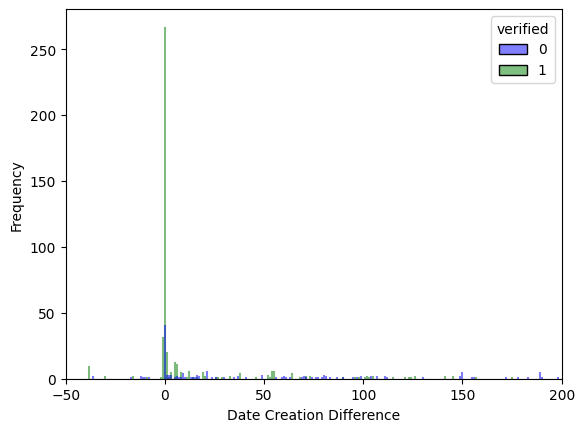

In [8]:
# Create the histogram
palette = {0: 'blue', 1: 'green'}
sns.histplot(data=data, x='date_creation_diff', hue='verified', bins=10, alpha=0.5, palette=palette, discrete=True)

# Add labels
plt.xlabel('Date Creation Difference')
plt.ylabel('Frequency')

lower_bound = -50
upper_bound = 200
plt.xlim(lower_bound, upper_bound)
# Display the plot
plt.show()

Visualisation of the last_tx_in_days feature

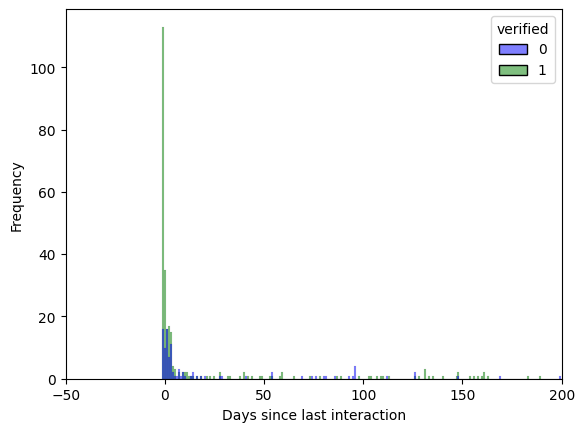

In [9]:
# Create the histogram
palette = {0: 'blue', 1: 'green'}
sns.histplot(data=data, x='last_tx_in_days', hue='verified', bins=10, alpha=0.5, palette=palette, discrete=True)

# Add labels
plt.xlabel('Days since last interaction')
plt.ylabel('Frequency')

lower_bound = -50
upper_bound = 200
plt.xlim(lower_bound, upper_bound)
# Display the plot
plt.show()

Visualisation of the gas feature

splitting the data into train and test

In [10]:
from sklearn.model_selection import train_test_split

y = data.verified.values
X = data.iloc[:,0:4]

# assuming 'X' is your feature data and 'y' is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


now we will create a decision tree

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

# Create an instance of the decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
# Use cross_val_predict to get the predicted labels for each sample in the test set
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
print("Accuracy: %0.2f " % (accuracy))
print("F1-score: %0.2f" % f1)
print("Recall: %0.2f" % recall)
print("Precision: %0.2f" % precision)

Accuracy: 0.84 
F1-score: 0.84
Recall: 0.84
Precision: 0.84


last_tx_in_days: 0.15507417193728681
date_creation_diff: 0.2850809095923279
gas: 0.3229597340037122
gas_price: 0.2368851844666731

Feature importances:
              Feature  Importance
2                 gas    0.322960
1  date_creation_diff    0.285081
3           gas_price    0.236885
0     last_tx_in_days    0.155074


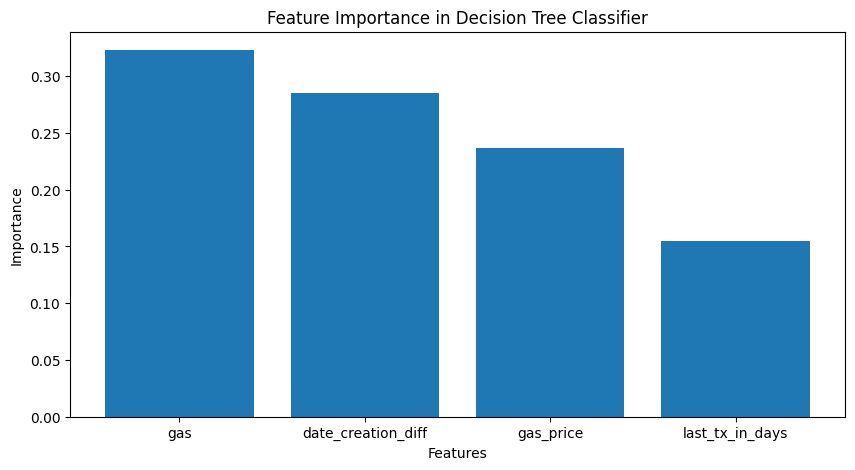

0.2368851844666731

In [18]:
importances = clf.feature_importances_

# Print feature importance for each feature
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance}")

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Decision Tree Classifier')
plt.show()
importance

Visualizing the decision tree

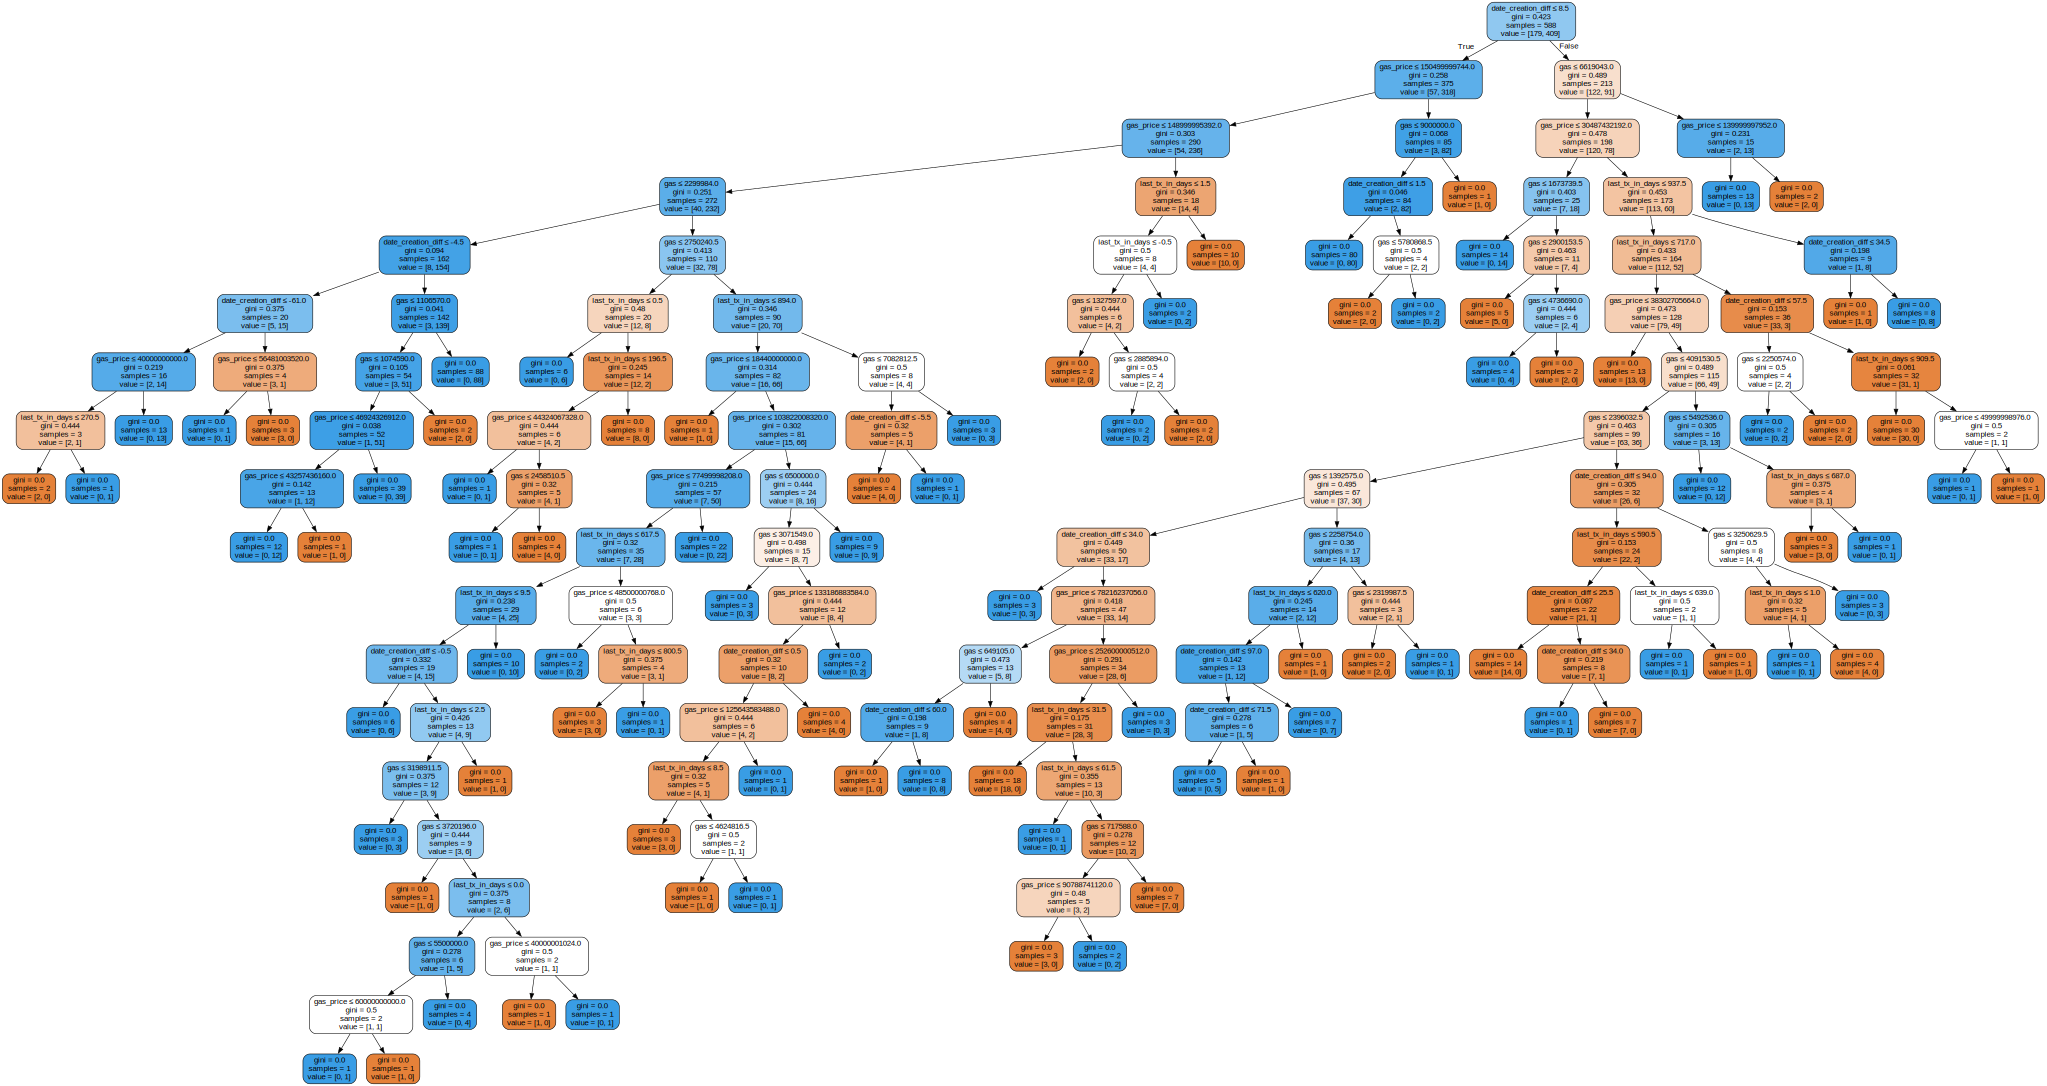

In [12]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=['last_tx_in_days', 'date_creation_diff', 'gas', 'gas_price'],  
                                # class_names=[0,1],  
                                filled=True, rounded=True,  
                                special_characters=True)

graph = graphviz.Source(dot_data)
graph

Now we will use Logistic Reggression

In [13]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
                        
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Recall:", recall)
print("Precision:", precision)

Accuracy: 0.7094594594594594
F1-score: 0.8300395256916996
Recall: 1.0
Precision: 0.7094594594594594
